In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from scipy import stats
from statannot import add_stat_annotation
from itertools import combinations

In [2]:
pre_ablation_path = "/users/hjd/Revision/data/pre_training"
file_path_list = [os.path.join(pre_ablation_path,i) for i in os.listdir(pre_ablation_path) if 'npy' not in i]
file_path_list

['/users/hjd/Revision/data/pre_training/pretraining_result_excluding_[]',
 "/users/hjd/Revision/data/pre_training/pretraining_result_excluding_[['DMN', 'DMN']]",
 "/users/hjd/Revision/data/pre_training/pretraining_result_excluding_[['VIS', 'VIS']]",
 "/users/hjd/Revision/data/pre_training/pretraining_result_excluding_[['CON', 'CON']]",
 "/users/hjd/Revision/data/pre_training/pretraining_result_excluding_[['VAN', 'VAN']]",
 "/users/hjd/Revision/data/pre_training/pretraining_result_excluding_[['DMN', 'CON']]",
 "/users/hjd/Revision/data/pre_training/pretraining_result_excluding_[['DMN', 'DAN']]",
 "/users/hjd/Revision/data/pre_training/pretraining_result_excluding_[['DAN', 'DAN']]"]

In [5]:
mean_acc_dict=dict()
for idx,result in enumerate(file_path_list):
    excluded_cons = result.split("_")[-1]
    result_csv = pd.read_csv(result,index_col=0)
    result_csv['Fold'] = result_csv.index
    try:
        result_csv['excluded_FNs'] = "-".join(eval(excluded_cons)[0])
        mean_acc_dict["-".join(eval(excluded_cons)[0])] = [result_csv['test_acc'].mean()]
    except:
        result_csv['excluded_FNs'] = "None"
        result_csv['Fold'] +=1
        mean_acc_dict["None"] = [result_csv['test_acc'].mean()]
    if idx ==0:
        result_csv_fin = result_csv
    else:
        result_csv_fin = pd.concat([result_csv_fin,result_csv])
#     break

In [6]:
result_csv_fin

,test_loss,test_acc,Fold,excluded_FNs,test_p
0,"tensor(0.7196, device='cuda:0')",0.201300,1,None,NaN
1,"tensor(0.7223, device='cuda:0')",0.131963,2,None,NaN
2,"tensor(0.7419, device='cuda:0')",0.142930,3,None,NaN
3,"tensor(0.7234, device='cuda:0')",0.161599,4,None,NaN
4,"tensor(0.7266, device='cuda:0')",0.155123,5,None,NaN
1,0.442076,0.185163,1,DMN-DMN,4.068039e-12
2,0.44375,0.135255,2,DMN-DMN,4.535855e-07
3,0.458452,0.134896,3,DMN-DMN,4.867427e-07
4,0.446867,0.149785,4,DMN-DMN,2.234020e-08
5,0.442967,0.149970,5,DMN-DMN,2.146081e-08


In [8]:
mean_acc_dict

{'None': [0.15858300328254699],
 'DMN-DMN': [0.15101378567605198],
 'VIS-VIS': [0.1558489624493373],
 'CON-CON': [0.15645427310121485],
 'VAN-VAN': [0.15790084765077092],
 'DMN-CON': [0.15639173838885428],
 'DMN-DAN': [0.15480491629016996],
 'DAN-DAN': [0.15630728111777353]}

(0.15, 0.16)

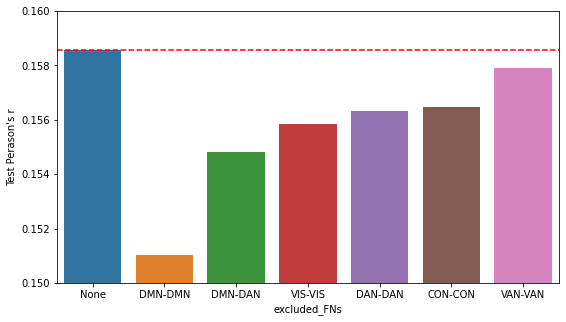

In [20]:
ascending_order = pd.DataFrame(mean_acc_dict).T.sort_values(by=0).index.tolist()
ascending_order.remove("None")
ascending_order.remove('DMN-CON')
ascending_order.insert(0,"None")

plt.figure(figsize=(9,5))
sns.barplot(data= result_csv_fin, x= 'excluded_FNs', y='test_acc',orient='v',ci=None,order=ascending_order,)
plt.axhline(mean_acc_dict['None'],color='red',linestyle='--')
plt.ylabel("Test Perason's r")
plt.ylim(0.15,0.16)
# plt.ylim(0.12,0.18)

In [21]:
from scipy.stats import ttest_rel
from itertools import combinations

In [22]:
fns_list = np.unique(result_csv_fin['excluded_FNs'])
fn_pairs_list = [i for i in combinations(fns_list,2)]

for fn_pair in fn_pairs_list:
    f1 = result_csv_fin.loc[result_csv_fin['excluded_FNs']==fn_pair[0],'test_acc']
    f2 = result_csv_fin.loc[result_csv_fin['excluded_FNs']==fn_pair[1],'test_acc']
    t,p = ttest_rel(f1,f2)
    if p<0.05:
        print(f"Performance significance: {fn_pair}, t={np.round(t,3)}, p={np.round(p,3)}")

Performance significance: ('DMN-CON', 'DMN-DMN'), t=2.875, p=0.045
Performance significance: ('DMN-DAN', 'VAN-VAN'), t=-5.951, p=0.004
Performance significance: ('DMN-DMN', 'VAN-VAN'), t=-3.593, p=0.023
